In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\chuan\appd

In [2]:
XOR_X = [[0, 0], [0, 1], [1, 0], [1, 1]]
XOR_Y = [[0], [1], [1], [0]]

In [3]:
# Setting up Tensorflow vaiables (inputs, weights, and biases)
x_ = tf.placeholder(tf.float32, shape=[4,2], name="x-input")
y_ = tf.placeholder(tf.float32, shape=[4,1], name="y-input")

w1 = tf.Variable(tf.random_uniform([2,2], -1, 1), name="w1")
w2 = tf.Variable(tf.random_uniform([2,1], -1, 1), name="w2")
b1 = tf.Variable(tf.zeros([2]), name="b1")
b2 = tf.Variable(tf.zeros([1]), name="b2")

In [4]:
# Building Model
layer1 = tf.tanh(tf.matmul(x_, w1) + b1)
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

In [5]:
# cost function
cost_function = tf.reduce_mean(((y_ * tf.log(layer2)) + ((1 - y_) * tf.log(1.0 - layer2))) * -1)
train_step = lambda learning_rate: tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [128]:
epochs = 5
start_time = time.time()
lr = 0.1
training = train_step(lr)

costs = []
weight1 = []
bias1 = []
weight2 = []
bias2 = []

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

initial_cost = float(sess.run(cost_function, feed_dict={x_: XOR_X, y_: XOR_Y}))
costs.append(initial_cost)
weight1.append(sess.run(w1))
weight2.append(sess.run(w2))
bias1.append(sess.run(b1))
bias2.append(sess.run(b2))

for i in range(epochs):
    error = sess.run(training, feed_dict={x_: XOR_X, y_: XOR_Y})
    cost = float(sess.run(cost_function, feed_dict={x_: XOR_X, y_: XOR_Y}))
    costs.append(round(cost, 4))
    weight1.append(sess.run(w1))
    weight2.append(sess.run(w2))
    bias1.append(sess.run(b1))
    bias2.append(sess.run(b2))

print(f"epochs: {epochs} \t elpesed: {round(time.time() - start_time, 2)} s")
print(f"initial cost: {initial_cost}")
print(f"cost: {cost}")

epochs: 5 	 elpesed: 0.18 s
initial cost: 0.6891343593597412
cost: 0.6858043074607849


In [129]:
iterations = np.arange(0, len(costs), 1)
costs = np.array(costs)

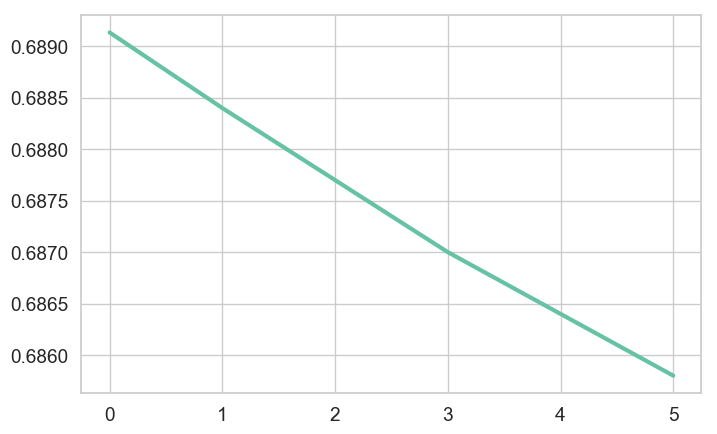

In [130]:
fig = plt.figure(figsize=(8, 5), dpi=100)
sns.lineplot(iterations, costs)

In [140]:
weight1 = np.array(weight1)
bias1 = np.array(bias1)
weight2 = np.array(weight2)
bias2 = np.array(bias2)
df = pd.DataFrame({
    'iteration': iterations,
    'cost': costs,
    'l1_n1_w0': bias1[:, 0],
    'l1_n1_w1': weight1[:, 0, 0],
    'l1_n1_w2': weight1[:, 0, 1],
    'l1_n2_w0': bias1[:, 1],
    'l1_n2_w1': weight1[:, 1, 0],
    'l1_n2_w2': weight1[:, 1, 1],
    'l2_n1_w0': bias1[:, 0],
    'l2_n1_w1': weight2[:, 0, 0],
    'l2_n1_w2': weight2[:, 1, 0]
})

In [143]:
df

,iteration,cost,l1_n1_w0,l1_n1_w1,l1_n1_w2,l1_n2_w0,l1_n2_w1,l1_n2_w2,l2_n1_w0,l2_n1_w1,l2_n1_w2
0,0,0.689134,0.000000,-0.224981,-0.319880,0.000000,0.807590,-0.648327,0.000000,-0.288634,-0.830364
1,1,0.688400,0.002222,-0.224649,-0.322145,0.002090,0.809090,-0.648723,0.002222,-0.291841,-0.828248
2,2,0.687700,0.004408,-0.224355,-0.324464,0.004018,0.810577,-0.649197,0.004408,-0.295003,-0.826244
3,3,0.687000,0.006558,-0.224099,-0.326834,0.005791,0.812051,-0.649746,0.006558,-0.298120,-0.824348
4,4,0.686400,0.008673,-0.223880,-0.329256,0.007416,0.813514,-0.650370,0.008673,-0.301193,-0.822554
5,5,0.685800,0.010755,-0.223697,-0.331726,0.008901,0.814964,-0.651065,0.010755,-0.304224,-0.820858


In [147]:
sess.run(layer1, feed_dict={x_: XOR_X, y_: XOR_Y})

array([[ 0.01075477,  0.00890046],
       [ 0.678171  , -0.5663714 ],
       [-0.20978078, -0.31205958],
       [ 0.53848714, -0.750409  ]], dtype=float32)